In [1]:
from screenTools import *

In [2]:
#args = vars(parser.parse_args())

args = {
    "number of plates":2,
    "peptide1":'104',
    "peptide2":'86',
    "path":"./AM_2.14.22_Plate_14-15.xlsx",
    "controls":["A1", "A2", "A3", "H10", "H11", "H12"],
    "selectivity threshold 1":1,
    "selectivity threshold 2":2,
}

plate_order = []
for plate in range(args["number of plates"]):
    plate_order.append(plate + 1)
    plate_order.append(plate + 1)

print("Expected plate order:", plate_order)

peptide_order = [args["peptide1"], args["peptide2"]] * args["number of plates"]

print("Expected peptide order:", peptide_order)

data = importPlates(args["path"], plate_order, peptide_order)
# positive_wells = ["A1", "A2", "A3", "H10", "H11", "H12"]
print("Got", data.shape[0], "datapoints.")
assignControls(data, args["controls"])
print("Control wells assigned: ", args["controls"])
pp = pivotPlates(data)
print(pp)
ratios = computeRatios(pp)
a = find_hits(
    ratios, -1, args["selectivity threshold 1"], args["selectivity threshold 2"]
)

Expected plate order: [1, 1, 2, 2]
Expected peptide order: ['104', '86', '104', '86']
Got 384 datapoints.
Control wells assigned:  ['A1', 'A2', 'A3', 'H10', 'H11', 'H12']
        plate_number row column     condition   value         
peptide                                           104       86
0                  1   A      1      positive  137638  1016032
1                  1   A     10  experimental    9446   326386
2                  1   A     11  experimental   42409   451842
3                  1   A     12  experimental      23     2307
4                  1   A      2      positive   65377  1138927
..               ...  ..    ...           ...     ...      ...
187                2   H      5  experimental      17      149
188                2   H      6  experimental   95907   725453
189                2   H      7  experimental     216     5790
190                2   H      8  experimental  177431   740878
191                2   H      9  experimental  282272   774566

[192 rows

In [4]:
pp.head()

plate_number row column     condition   value         
peptide                                           104       86
0                  1   A      1      positive  137638  1016032
1                  1   A     10  experimental    9446   326386
2                  1   A     11  experimental   42409   451842
3                  1   A     12  experimental      23     2307
4                  1   A      2      positive   65377  1138927

In [11]:
def find_hits_by_plate(
    data,
    stdev_threshold_brightness,
    stdev_threshold_selectivity_0,
    stdev_threshold_selectivity_1,
):
    hitlist = []
    for platenum in set(data['plate_number']):
        plate = data[data['plate_number']==platenum]
        plate_hits = find_hits(plate, stdev_threshold_brightness, stdev_threshold_selectivity_0, stdev_threshold_selectivity_1)
        hitlist.append(plate_hits)
    
    return pd.concat(hitlist)

r = find_hits_by_plate(
    ratios, -1, args["selectivity threshold 1"], args["selectivity threshold 2"]
)
print('104 hits:', r[r['to_pick']=='104'].shape[0])
print('86 hits:', r[r['to_pick']=='86'].shape[0])

104 hits: 9
86 hits: 14


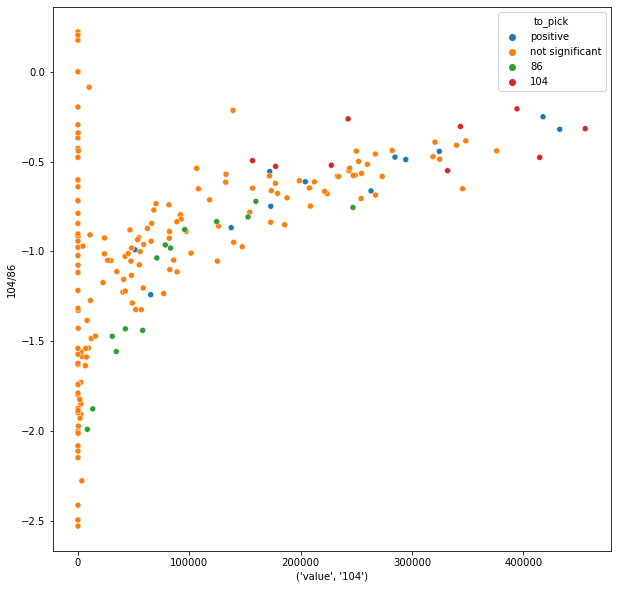

In [9]:
plot_performance(r,'104','86')